# Regression Predict
### Team_19_JHB_RuPaul'sRegRace
---
<img src="https://github.com/Lizette95/regression-predict-api-template/blob/master/utils/banner.png?raw=true" align="left">  


### Table of Contents
---
1. [Introduction](#intro)
 * Project Description
 * Datasets and Variables
---
2. [Module Imports](#imports)
---
3. [Data Cleaning](#data)
 * Load Data
 * Merge Datasets
 * Missing Data
 * Remove Target Outliers
---
4. [Exploratory Data Analysis](#EDA)
 * Data Summary Statistics
 * Univariate Analysis and Visualisation
 * Bivariate Analysis and Visualisation
 * Map Visualisation
 * Feature Correlation Analyis
---
5. [Data Preprocessing](#preprocessing) 
 * Feature Engineering
 * Encoding Categorical Data
 * Split Training Set Into Training and Validation Sets
 * Feature Scaling
 * Feature Relationships

---
6. [Modelling](#modelling)
---
7. [Performance Evaluation](#evaluation)
---
8. [Model Analysis](#analysis)
---
9. [Conclusion](#conclusion)

<a id="intro"></a>
## 1. Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised learning statistical method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

The Zindi challenge, hosted by Sendy in partnership with insight2impact facility, is to build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package. An accurate arrival time will enhance customer communication and customer experience. In addition, the solution will help businesses reduce the cost of trade through better management of resources and planning.


The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders, from pick-up to drop-off. The training dataset is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. 

### Datasets and Variables  

**train_data:** The dataset that will be used to train our model  
**test_data:** The dataset on which we will apply our model to  
**riders:** Contains unique rider IDs, number of orders, age, rating and number of ratings

**Order details**  
* Order No: Unique number identifying the order  
* User Id: Unique number identifying the customer on a platform  
* Vehicle Type: For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans  
* Platform Type: Platform used to place the order (there are 4 types)  
* Personal or Business: Customer type  

**Placement times**  
* Placement: Day of Month (i.e 1-31)  
* Placement: Weekday (Monday = 1)  
* Placement: Time - Time of day the order was placed  

**Confirmation times**  
* Confirmation: Day of Month (i.e 1-31)  
* Confirmation: Weekday (Monday = 1)  
* Confirmation: Time (Time of day the order was confirmed by a rider)  

**Arrival at Pickup times**  
* Arrival at Pickup: Day of Month (i.e 1-31)  
* Arrival at Pickup: Weekday (Monday = 1)  
* Arrival at Pickup: Time (Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application)  

**Pickup times**  
* Pickup: Day of Month (i.e 1-31)  
* Pickup: Weekday (Monday = 1)  
* Pickup: Time (Time of day the rider picked up the order - as marked by the rider through the Sendy application)  

**Arrival at Destination times** (not in Test set)  
* Arrival at Delivery: Day of Month (i.e 1-31)  
* Arrival at Delivery: Weekday (Monday = 1)  
* Arrival at Delivery: Time (Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application)  
* Distance covered (KM): The distance from Pickup to Destination  
* Temperature: Temperature at the time of order placement in Degrees Celsius (measured every three hours)  
* Precipitation in Millimeters: Precipitation at the time of order placement (measured every three hours)  
* Pickup Latitude and Longitude: Latitude and longitude of pick up location  
* Destination Latitude and Longitude: Latitude and longitude of delivery location  
* Rider ID: ID of the Rider who accepted the order  
* Time from Pickup to Arrival: Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ **(Target variable)**    

**Rider metrics**  
* Rider ID: Unique number identifying the rider (same as in order details)  
* No of Orders: Number of Orders the rider has delivered  
* Age: Number of days since the rider delivered the first order  
* Average Rating: Average rating of the rider  
* No of Ratings: Number of ratings the rider has received. Rating an order is optional for the customer

<a id="imports"></a>
## 2. Module Imports

In [0]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
#!{sys.executable} -m pip install folium
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Display
%matplotlib inline
sns.set_style("white")

<a id="data"></a>
## 3. Data Cleaning

### Load Data

In [0]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Test.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/Lizette95/regression-predict-api-template/master/utils/data/Riders.csv')

In [0]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


### Merge Datasets

In [0]:
# List columns not present in the test dataset
for column in train_data.columns:
    if column not in test_data.columns:
        print(column)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [0]:
# Merge datasets
train_data = pd.merge(train_data,riders,on='Rider Id',how='left')
test_data = pd.merge(test_data,riders,on='Rider Id',how='left')

# Rename columns

train_data.columns = [column.replace("Of","of") for column in train_data.columns]
train_data.columns = [column.replace("_"," ") for column in train_data.columns]
train_data.columns = [column.replace("(Mo = 1)"," ") for column in train_data.columns]
train_data = train_data.rename(columns=lambda x: x.strip())
test_data.columns = [column.replace("Of","of") for column in test_data.columns]
test_data.columns = [column.replace("_"," ") for column in test_data.columns]
test_data.columns = [column.replace("(Mo = 1)"," ") for column in test_data.columns]
test_data = test_data.rename(columns=lambda x: x.strip())

In [0]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [0]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No of Orders,Age,Average Rating,No of Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


### Missing Data

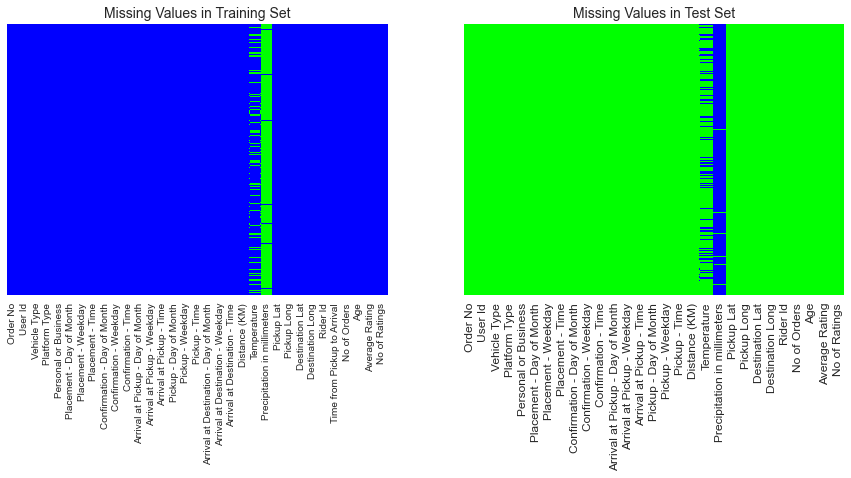

,% missing training data,% missing testing data
Precipitation in millimeters,97.40,97.18
Temperature,20.59,20.33


In [0]:
# Check columns for missing values
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='brg',ax=axis[0])
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='brg_r',ax=axis[1])
axis[0].set_title('Missing Values in Training Set',fontsize=14)
axis[1].set_title('Missing Values in Test Set',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate percentage missing values
train = round((train_data.isnull().sum()/train_data.isnull().count())*100,2)
test = round((test_data.isnull().sum()/test_data.isnull().count())*100,2)
d = {'% missing training data': train, '% missing testing data': test}
pd.DataFrame(data=d).sort_values(by='% missing training data',ascending=False).head(2)

* We can remove the 'Precipitation in millimeters' column, as 97% of the data is missing
* We can impute missing values in the 'Temperature' column with the average temperature at the time the order was placed, as only 20% of the data is missing

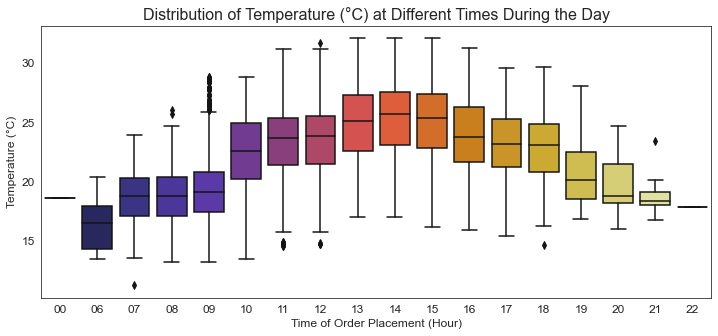

In [0]:
# Drop 'Precipitation in millimeters' column
train_data.drop('Precipitation in millimeters',axis=1,inplace=True)
test_data.drop('Precipitation in millimeters',axis=1,inplace=True)

# Create 24h time bins for when orders were placed
train_data['Placement - Time(bins)'] = pd.to_datetime(pd.to_datetime(train_data['Placement - Time']).dt.strftime('%H:%M:%S')).dt.strftime('%H')

fig,axis = plt.subplots(figsize=(12,5))
sns.boxplot(x='Placement - Time(bins)',y='Temperature',data=train_data,palette='CMRmap')
plt.title('Distribution of Temperature (°C) at Different Times During the Day',fontsize=16)
plt.xlabel('Time of Order Placement (Hour)',fontsize=12)
plt.ylabel('Temperature (°C)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Impute temperature for missing values
train_data['Temperature'] = train_data['Temperature'].fillna(round(train_data.groupby('Placement - Time(bins)')['Temperature'].transform('mean'),1))
test_data['Temperature'] = test_data['Temperature'].fillna(round(train_data.groupby('Placement - Time(bins)')['Temperature'].transform('mean'),1))

### Remove Target Outliers

Assuming that, by law, the maximum travelling speed allowed is 120km/h, we can calculate the minimum travel time as:  

$Time = \frac{Distance}{Speed} =  \frac{1km}{120km/h} = 30 {seconds/km} $

We can therefore exclude outliers from 'Time from Pickup to Arrival' column based on the distance travelled:

When Distance = 1 km (Exclude data if Time from Pickup to Arrival < 30 seconds)
<br>
When Distance = 2 km (Exclude data if Time from Pickup to Arrival < 60 seconds)
<br>
When Distance = 3 km (Exclude data if Time from Pickup to Arrival < 90 seconds)
<br>
...  
etc.

In [0]:
#Identify outliers in target variable
train_data['Not Outlier'] = (train_data['Distance (KM)']*30) < train_data['Time from Pickup to Arrival']
print("There are " + str(len(train_data[train_data['Not Outlier']==False])) + " outliers in our target variable.")

There are 876 outliers in our target variable.


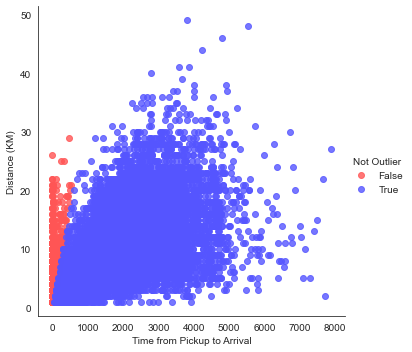

In [0]:
sns.lmplot(x='Time from Pickup to Arrival', y='Distance (KM)', data=train_data, hue='Not Outlier', palette='seismic_r', fit_reg=False)
plt.show()

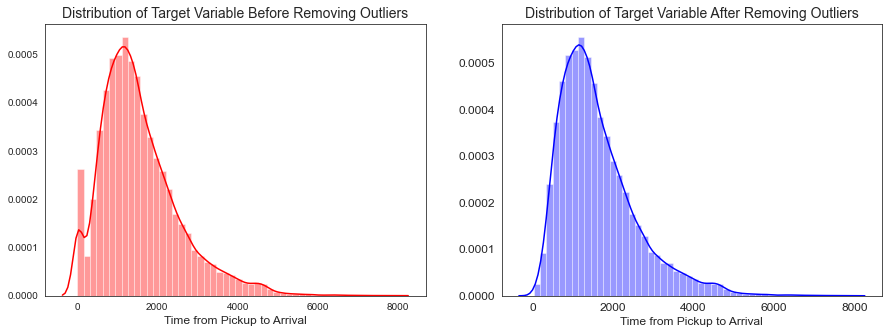

In [0]:
# Remove outliers
new_train_data = train_data[train_data['Not Outlier'] == True]
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(train_data['Time from Pickup to Arrival'],ax=axis[0],color='red')
sns.distplot(new_train_data['Time from Pickup to Arrival'],ax=axis[1],color='blue')
axis[0].set_title('Distribution of Target Variable Before Removing Outliers',fontsize=14)
axis[1].set_title('Distribution of Target Variable After Removing Outliers',fontsize=14)
axis[0].set_xlabel('Time from Pickup to Arrival',fontsize=12)
axis[1].set_xlabel('Time from Pickup to Arrival',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Remove outlier column
train_data = train_data[train_data['Not Outlier'] == True]
train_data = train_data.drop(['Not Outlier'],axis=1)

<a id="EDA"></a>
## 4. Exploratory Data Analysis

### Data Summary Statistics

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20325 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Order No                               20325 non-null  object 
 1   User Id                                20325 non-null  object 
 2   Vehicle Type                           20325 non-null  object 
 3   Platform Type                          20325 non-null  int64  
 4   Personal or Business                   20325 non-null  object 
 5   Placement - Day of Month               20325 non-null  int64  
 6   Placement - Weekday                    20325 non-null  int64  
 7   Placement - Time                       20325 non-null  object 
 8   Confirmation - Day of Month            20325 non-null  int64  
 9   Confirmation - Weekday                 20325 non-null  int64  
 10  Confirmation - Time                    20325 non-null  object 
 11  Ar

In [0]:
train_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday,Confirmation - Day of Month,Confirmation - Weekday,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,Pickup - Day of Month,Pickup - Weekday,Arrival at Destination - Day of Month,...,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No of Orders,Age,Average Rating,No of Ratings
count,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,...,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000,20325.000000
mean,2.743469,15.645166,3.241328,15.645314,3.241476,15.645314,3.241476,15.645314,3.241476,15.645314,...,23.212905,-1.281244,36.811072,-1.282611,36.811317,1622.426863,1644.402952,973.002214,13.893009,340.341205
std,0.634275,8.792534,1.568850,8.792503,1.568781,8.792503,1.568781,8.792503,1.568781,8.792503,...,3.358326,0.030601,0.037749,0.035076,0.045017,955.300283,1504.827591,636.908788,0.907283,403.908905
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.200000,-1.438302,36.653621,-1.430298,36.606594,34.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,20.800000,-1.300921,36.783473,-1.301446,36.785618,939.000000,557.000000,495.000000,13.700000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,23.500000,-1.279395,36.806509,-1.284575,36.808002,1412.000000,1209.000000,872.000000,14.000000,158.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,25.400000,-1.257147,36.828477,-1.261007,36.829263,2077.000000,2273.000000,1218.000000,14.300000,504.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


### Univariate Analysis and Visualisation

In this section we will analyze and visualise data that involves a single variable:  
* Platform Type
* Customer Type (Personal or Business)
* Orders and Deliveries Per Day of the Month
* Orders and Deliveries Per Day of the Week
* Distance From Pickup to Destination

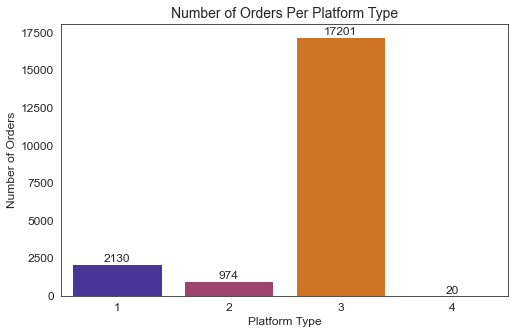

In [0]:
# Platform Type
fig,axis = plt.subplots(figsize=(8, 5))
ax_PT = sns.countplot(x='Platform Type',data=train_data,palette='CMRmap')
plt.title('Number of Orders Per Platform Type',fontsize=14)
plt.xlabel('Platform Type',fontsize=12)
plt.ylabel('Number of Orders',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax_PT.patches:
    ax_PT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

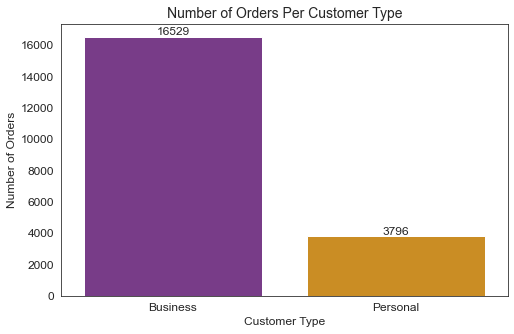

In [0]:
# Customer Type (Personal or Business)
fig,axis = plt.subplots(figsize=(8, 5))
ax_CT = sns.countplot(x='Personal or Business',data=train_data,palette='CMRmap')
plt.title('Number of Orders Per Customer Type',fontsize=14)
plt.xlabel('Customer Type',fontsize=12)
plt.ylabel('Number of Orders',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax_CT.patches:
    ax_CT.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
plt.show()

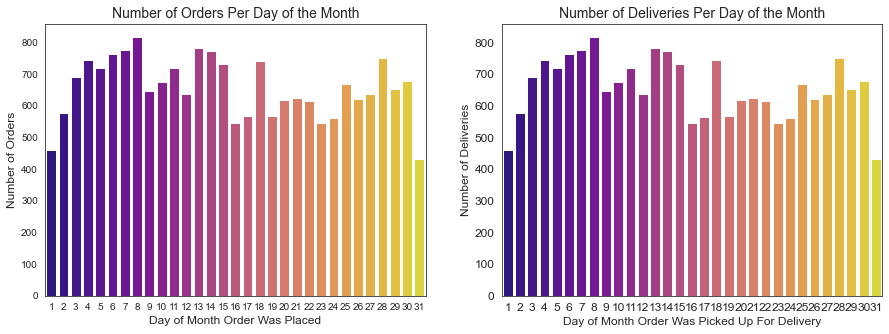

In [0]:
# Orders and Deliveries per day of the month
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(x='Placement - Day of Month',data=train_data,palette='plasma',ax=axis[0])
sns.countplot(x='Pickup - Day of Month',data=train_data,palette='plasma',ax=axis[1])
axis[0].set_title('Number of Orders Per Day of the Month',fontsize=14)
axis[1].set_title('Number of Deliveries Per Day of the Month',fontsize=14)
axis[0].set_xlabel('Day of Month Order Was Placed',fontsize=12)
axis[1].set_xlabel('Day of Month Order Was Picked Up For Delivery',fontsize=12)
axis[0].set_ylabel('Number of Orders',fontsize=12)
axis[1].set_ylabel('Number of Deliveries',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

'Day of Month' is a cyclical feature and can be converted to a more appropriate format during feature engineering, prior to building our model.

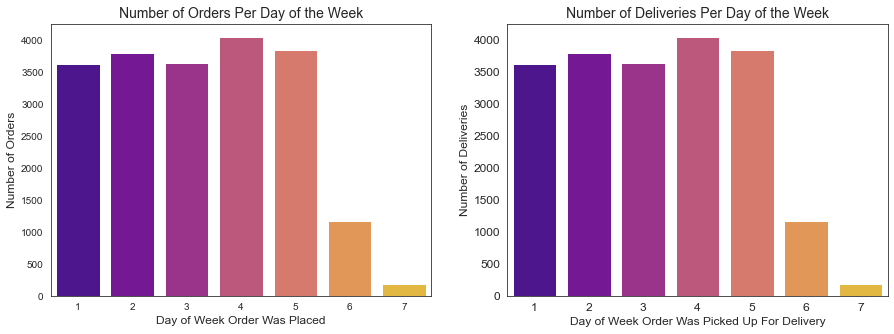

In [0]:
# Orders and Deliveries per day of the week
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(x='Placement - Weekday',data=train_data,palette='plasma',ax=axis[0])
sns.countplot(x='Pickup - Weekday',data=train_data,palette='plasma',ax=axis[1])
axis[0].set_title('Number of Orders Per Day of the Week',fontsize=14)
axis[1].set_title('Number of Deliveries Per Day of the Week',fontsize=14)
axis[0].set_xlabel('Day of Week Order Was Placed',fontsize=12)
axis[1].set_xlabel('Day of Week Order Was Picked Up For Delivery',fontsize=12)
axis[0].set_ylabel('Number of Orders',fontsize=12)
axis[1].set_ylabel('Number of Deliveries',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

'Weekday' is a cyclical feature and can be converted to a more appropriate format during feature engineering, prior to building our model.

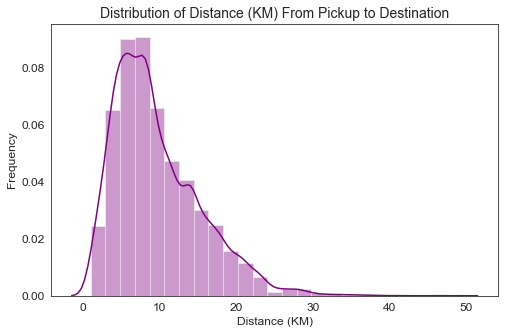

In [0]:
# Distribution of distance from pickup to destination
fig,axis = plt.subplots(figsize=(8, 5))
sns.distplot(train_data['Distance (KM)'],bins=25,color='purple')
plt.title('Distribution of Distance (KM) From Pickup to Destination',fontsize=14)
plt.xlabel('Distance (KM)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Bivariate Analysis and Visualisation

In this section we will analyze and visualise data that involves two variables:
* Distance vs. Delivery Duration
* Average Delivery Duration Per Day of the Month
* Average Delivery Duration Per Day of the Week
* Average Delivery Duration Per Platform Type
* Average Delivery Duration Per Customer Type
* Average Distance Per Day of the Month
* Average Distance Per Day of the Week
* Average Distance Per Platform Type
* Average Distance Per Customer Type

In [0]:
# Correlation of numerical variables & target variable
# train_numerical = train_data[['Distance (KM)','Temperature','Pickup Lat','Pickup Long','Destination Lat','Destination Long','No_Of_Orders','Age','Average_Rating','No_of_Ratings','Time from Pickup to Arrival']]
# cmatrix = train_numerical.corr()
# sns.heatmap(cmatrix, square=True, cmap='BuPu')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [0]:
# fig,axis = plt.subplots(figsize=(12,5))
# sns.distplot(train_data['Time from Pickup to Arrival'],color='purple')
# plt.title('Distribution of Time From Pickup to Arrival',fontsize=14)
# plt.xlabel('Time From Pickup to Arrival',fontsize=12)
# plt.ylabel('Count',fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [0]:
# sns.catplot(x='Platform Type', y='Time from Pickup to Arrival',data=train_data.sort_values('Platform Type'),kind='box',height=5,aspect=2,palette='nipy_spectral')
# plt.title('Distribution of Time from Pickup to Arrival Per Platform Type',fontsize=14)
# plt.xlabel('Platform Type',fontsize=12)
# plt.ylabel('Time from Pickup to Arrival',fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [0]:
# pd.DataFrame(cmatrix['Time from Pickup to Arrival'].abs().sort_values(ascending=False))

<a id="preprocessing"></a>
## 5. Data Preprocessing

### Feature Engineering

In [0]:
# Convert day of month features to cyclical format

# Convert weekday features to cyclical format

# Convert time features to cyclical format

In [0]:
# Convert coordinates with geohashing

In [0]:
# Rank riders by weighted rating value and efficiency

### Encoding Categorical Data

In [0]:
#Function to calculate number of time in seconds (from midnight)
def time_in_seconds_train(column):
    train_data[column] = pd.to_datetime(train_data[column])
    return (train_data[column] - pd.to_datetime(pd.to_datetime('today').date())).astype('timedelta64[s]')

#Converting time in dataset
train_data['Placement - Time'] = time_in_seconds_train('Placement - Time')
train_data['Confirmation - Time'] = time_in_seconds_train('Confirmation - Time')
train_data['Pickup - Time'] = time_in_seconds_train('Pickup - Time')
train_data['Arrival at_Pickup - Time'] = time_in_seconds_train('Arrival at Pickup - Time')
train_data['Arrival at Destination - Time'] = time_in_seconds_train('Arrival at Destination - Time')

In [0]:
# Check how many unique items are in each column of indepedent variables
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        unique_out = len(train_data[col_name].unique())
        print(f"Feature '{col_name}' has {unique_out} unique catergories")

Feature 'Order No' has 20325 unique catergories
Feature 'User Id' has 3172 unique catergories
Feature 'Vehicle Type' has 1 unique catergories
Feature 'Personal or Business' has 2 unique catergories
Feature 'Rider Id' has 921 unique catergories
Feature 'Placement - Time(bins)' has 17 unique catergories


In [0]:
# Drop unnecessary columns
train_data = train_data.drop(['Order No','User Id','Vehicle Type','Rider Id','Placement - Time(bins)'],axis=1)

# Rearrange columns
column_titles = [col for col in train_data.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
train_data = train_data.reindex(columns=column_titles)
train_data.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday,Placement - Time,Confirmation - Day of Month,Confirmation - Weekday,Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No of Orders,Age,Average Rating,No of Ratings,Arrival at_Pickup - Time,Time from Pickup to Arrival
0,3,Business,9,5,34546.0,9,5,34810.0,9,5,...,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,36287.0,745
1,3,Personal,12,5,40576.0,12,5,41001.0,12,5,...,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69,42022.0,1993
2,3,Business,30,2,45565.0,30,2,45764.0,30,2,...,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114,46174.0,455
3,3,Business,15,5,33934.0,15,5,33965.0,15,5,...,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,113,34676.0,1341
4,1,Personal,13,1,35718.0,13,1,35778.0,13,1,...,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,533,36233.0,1214


In [0]:
# Create matrix of features
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values

# Encode categorical data
labelencoder_personal_business = LabelEncoder()
X[:,1] = labelencoder_personal_business.fit_transform(X[:,1]) 

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 ... 13.8 549 36287.0]
 [0.0 0.0 1.0 ... 13.6 69 42022.0]
 [0.0 0.0 1.0 ... 12.5 114 46174.0]
 ...
 [0.0 0.0 1.0 ... 13.8 29 63017.0]
 [1.0 0.0 0.0 ... 14.0 1101 34739.0]
 [0.0 0.0 1.0 ... 13.6 70 51869.0]]


### Split Training Set Into Training and Validation Sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [0]:
sc_X = StandardScaler()
X_train[:,5:] = sc_X.fit_transform(X_train[:,5:])
X_test[:,5:] = sc_X.transform(X_test[:,5:])

### Feature Relationships

<a id="modelling"></a>
## 6. Modelling

<a id="evaluation"></a>
## 7. Performance Evaluation

<a id="analysis"></a>
## 8. Model Analysis

<a id="conclusion"></a>
## 9. Conclusion

...